# Comportamiento de Usuarios

## Paso 1. Carga y lectura de Archivos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
logs = pd.read_csv("/datasets/logs_exp_us.csv", sep = "\t")

In [3]:
logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


## Paso 2. Preparacion de los datos

In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Se modificaran los nombres de las columnas y cambiara el tipo de dato de la variable EventTimestamp

In [5]:
logs.columns = ["evento", "usuario", "timestamp", "exp_id"] #Se modifican los nombres d elas columnas

In [6]:
logs["fecha_evento"] = pd.to_datetime(logs["timestamp"], unit = "s") #Se modifica el tipo de dato por uno de tipo fecha


In [7]:
logs["dia"] = logs["fecha_evento"].dt.floor("1D") # Se crea la columna con unicamente la fecha sin incluir la hora

In [8]:
logs

,evento,usuario,timestamp,exp_id,fecha_evento,dia
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [9]:
print( f"Hay un total de {logs.duplicated().sum()} datos duplicados") #Se calcula el total de datos duplicados 

Hay un total de 413 datos duplicados


In [10]:
logs.drop_duplicates(inplace=True) #Se eliminan los datos duplicasdos sobre la base original

In [11]:
print( f"Hay un total de {logs.duplicated().sum()} datos duplicados") #Se corrobora que ya no haya mas datos duplicadops


Hay un total de 0 datos duplicados


In [12]:
logs.isna().sum() #Se revisa si hay valores ausentes en la tabla

evento          0
usuario         0
timestamp       0
exp_id          0
fecha_evento    0
dia             0
dtype: int64

## Paso 3. Analisis y comprobacion de tatos

In [13]:
print(f"Se tiene un totral de {len(logs)} eventos registrados")
print(f"Con un total de {len(logs['usuario'].unique())} usuarios unicos")
print(f"El promedio de eventos por usuario es de {len(logs)/len(logs['usuario'].unique()):.2f}")

Se tiene un totral de 243713 eventos registrados
Con un total de 7551 usuarios unicos
El promedio de eventos por usuario es de 32.28


In [14]:
print(f"Eventos del grupo 246: {len(logs[logs['exp_id'] == 246])}, Usuarios: {len(logs[logs['exp_id'] == 246]['usuario'].unique())}, Promedio: {len(logs[logs['exp_id'] == 246])/len(logs[logs['exp_id'] == 246]['usuario'].unique()):.2f} ")
print(f"Eventos del grupo 247: {len(logs[logs['exp_id'] == 247])}, Usuarios: {len(logs[logs['exp_id'] == 247]['usuario'].unique())}, Promedio: {len(logs[logs['exp_id'] == 247])/len(logs[logs['exp_id'] == 247]['usuario'].unique()):.2f} ")
print(f"Eventos del grupo 248: {len(logs[logs['exp_id'] == 248])}, Usuarios: {len(logs[logs['exp_id'] == 248]['usuario'].unique())}, Promedio: {len(logs[logs['exp_id'] == 248])/len(logs[logs['exp_id'] == 248]['usuario'].unique()):.2f} ")

Eventos del grupo 246: 80181, Usuarios: 2489, Promedio: 32.21 
Eventos del grupo 247: 77950, Usuarios: 2520, Promedio: 30.93 
Eventos del grupo 248: 85582, Usuarios: 2542, Promedio: 33.67 


In [15]:
print(f'Los registros comienzan a partir de la fecha {logs["dia"].min()} y terminan en  la fecha {logs["dia"].max()}.')
#Se busca lka fecha minima y maxima para establecer el periodo de datos que se tiene

Los registros comienzan a partir de la fecha 2019-07-25 00:00:00 y terminan en  la fecha 2019-08-07 00:00:00.


(array([18102., 18104., 18106., 18108., 18109., 18111., 18113., 18115.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

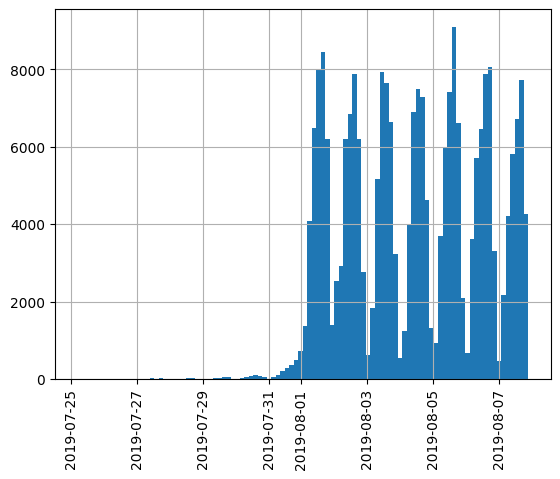

In [16]:
logs["fecha_evento"].hist(bins = 100) #generacion de historigrama
plt.xticks(rotation=90) #rotacion de etiquetas en el eje x

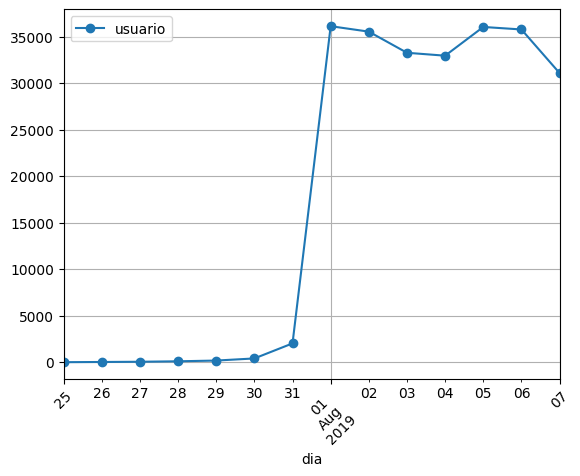

In [17]:
logs.pivot_table( index = "dia", values = "usuario", aggfunc = "count").plot(style ="o-", grid = True) #Se grafica la tabla que que cuenta el numero de usuarios que interactuan por dia 
plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados
plt.show()


Los datos relevantes se muestran apartir del primero de agosto, por lo cual a partir de esa fecha se tiene que realizar el analisis

In [18]:
datos_completos = logs.query("dia >= '2019-08-01'") #Se filtran los datos de la tabla original con solo aquellos registors que esten apoartir del primero de agosto

In [19]:
datos_completos # visualizacion

,evento,usuario,timestamp,exp_id,fecha_evento,dia
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


<AxesSubplot:>

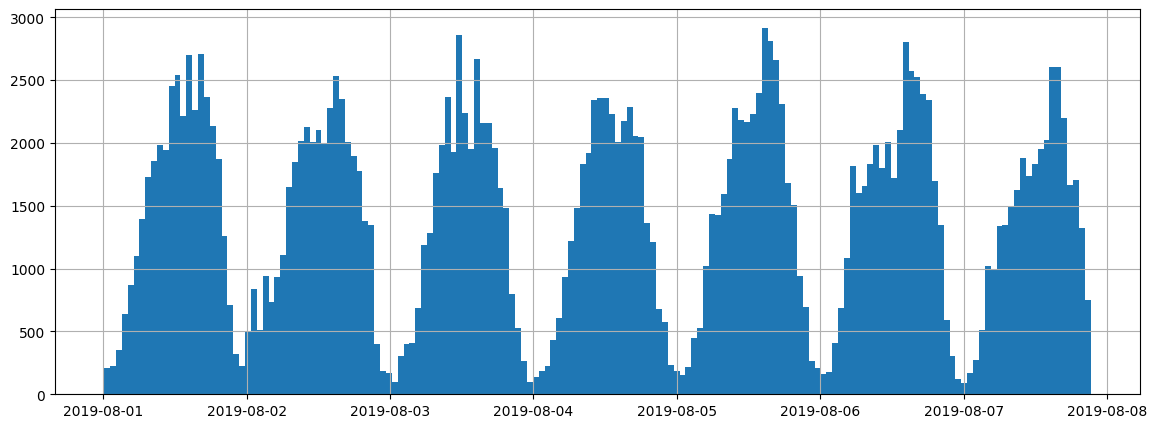

In [20]:
datos_completos["fecha_evento"].hist(bins= 7*24, figsize=(14,5)) #se vuelve a graficar el historigrama de los registros por hora u fecha

In [21]:
print(f"Se tiene un totral de {len(datos_completos)} eventos registrados tras haber filtrado la fecha")
print(f"Con un total de {len(datos_completos['usuario'].unique())} usuarios unicos")
print(f"El promedio de eventos por usuario es de {len(datos_completos)/len(datos_completos['usuario'].unique()):.2f}")

Se tiene un totral de 240887 eventos registrados tras haber filtrado la fecha
Con un total de 7534 usuarios unicos
El promedio de eventos por usuario es de 31.97


La cantidad de eventos totales en no disminullo en gran medida, unicamente se descartaron cerca de 3,000 eventos y elk numero de usuarios solo disminullo en 17, por lo cual solo se perdio el 0.2% de usuarios y el 1.1% de los eventos

In [22]:
datos_completos["exp_id"].value_counts() #Cantidad de eventos exparcidos en cada grupo

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

In [23]:
print(f"Eventos del grupo 246: {len(datos_completos[datos_completos['exp_id'] == 246])}, Usuarios: {len(datos_completos[datos_completos['exp_id'] == 246]['usuario'].unique())}, Promedio: {len(datos_completos[datos_completos['exp_id'] == 246])/len(datos_completos[datos_completos['exp_id'] == 246]['usuario'].unique()):.2f} ")
print(f"Eventos del grupo 247: {len(datos_completos[datos_completos['exp_id'] == 247])}, Usuarios: {len(datos_completos[datos_completos['exp_id'] == 247]['usuario'].unique())}, Promedio: {len(datos_completos[datos_completos['exp_id'] == 247])/len(datos_completos[datos_completos['exp_id'] == 247]['usuario'].unique()):.2f} ")
print(f"Eventos del grupo 248: {len(datos_completos[datos_completos['exp_id'] == 248])}, Usuarios: {len(datos_completos[datos_completos['exp_id'] == 248]['usuario'].unique())}, Promedio: {len(datos_completos[datos_completos['exp_id'] == 248])/len(datos_completos[datos_completos['exp_id'] == 248]['usuario'].unique()):.2f} ")

Eventos del grupo 246: 79302, Usuarios: 2484, Promedio: 31.93 
Eventos del grupo 247: 77022, Usuarios: 2513, Promedio: 30.65 
Eventos del grupo 248: 84563, Usuarios: 2537, Promedio: 33.33 


## Paso 4. Embudo de Eventos

In [24]:
print(logs["evento"].unique()) #Tipos de eventos unicos

['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [25]:
eventos = datos_completos.pivot_table(index="evento", values = "usuario", aggfunc = "count").sort_values("usuario", ascending = False) #creacion de tabla indexada por los tipos de eventos donde se cuenta el numero de interacciones con estas y ordenada de mayor a menor


In [26]:
eventos.columns = ["n_eventos"] #renombramiento d ela columna

In [27]:
eventos

,n_eventos
evento,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


In [28]:
evento_usuario = datos_completos.pivot_table(index="evento", values = "usuario", aggfunc = "nunique").sort_values("usuario", ascending = False) #Se genera una tabla que muestra cuantos usuarios han pasado por cada evento al menos una vez

In [29]:
evento_usuario

,usuario
evento,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


La seccion de tutorial no tiene ninguna relacion con el proceso de compra de la pagin, por lo cual se podria omitir 

In [30]:
evento_usuario/len(datos_completos["usuario"].unique()) #proporcion de usuarios que realizan cada etapa

,usuario
evento,
MainScreenAppear,0.984736
OffersScreenAppear,0.609636
CartScreenAppear,0.495620
PaymentScreenSuccessful,0.469737
Tutorial,0.111495


In [31]:
embudo = evento_usuario[:-1]
embudo = embudo / embudo.shift() #porcentage de usuarios que avanzan a la siguiente etapa
embudo.fillna(1)

,usuario
evento,
MainScreenAppear,1.000000
OffersScreenAppear,0.619086
CartScreenAppear,0.812976
PaymentScreenSuccessful,0.947777


Al pasar de MainScreenAppear a OffersScreenAppear es cuando s epierden mas usuarios, mientras que unicamentew el 46.97% de los usuarios totales hace todo el proceso concluyindo PaymentScreenSuccessful el 

In [32]:
datos_completos["exp_id"].value_counts() #Numero de usuarios por cada grupo

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

## Paso 5. Estudio de resultados

In [33]:
grupo_246 = datos_completos.query("exp_id == 246")#Se separan los grupos 
grupo_247 = datos_completos.query("exp_id == 247")
grupob_248 = datos_completos.query("exp_id == 248")

In [34]:
grupo_246

,evento,usuario,timestamp,exp_id,fecha_evento,dia
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2834,OffersScreenAppear,3737462046622621720,1564618226,246,2019-08-01 00:10:26,2019-08-01
...,...,...,...,...,...,...
244120,MainScreenAppear,5746969938801999050,1565212331,246,2019-08-07 21:12:11,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [35]:
eventos_246 = grupo_246.groupby('usuario').size() #agurpa por usuario el numero d eeventos para el grupo 246
eventos_247 = grupo_247.groupby('usuario').size() #agurpa por usuario el numero d eeventos para el grupo 247

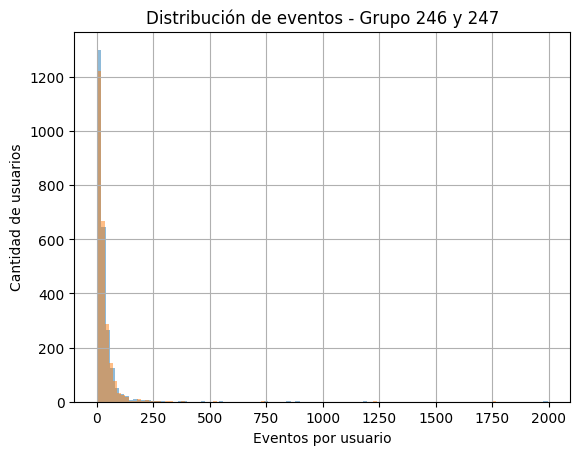

In [36]:
eventos_246.hist(bins=100, alpha = .5)
eventos_247.hist(bins=100, alpha = .5)
plt.xlabel('Eventos por usuario')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de eventos - Grupo 246 y 247')
plt.show()


In [37]:
u_stat, p_value = stats.mannwhitneyu(eventos_246, eventos_247, alternative='two-sided') #Se realiza prueba mannwhitneyu buscando diferencia entre los grupos
print(f"Con un valor p = {p_value:.4f}, no se considera ningana diferencia estadistica entre el grupo 246 y 247")

Con un valor p = 0.8722, no se considera ningana diferencia estadistica entre el grupo 246 y 247


In [38]:
def analizar_eventos(df, grupo_a, grupo_b, columna_evento='evento', columna_usuario='usuario', columna_grupo='exp_id'):
    resultados = []

    eventos = df[columna_evento].unique()

    for evento in eventos:
        # Filtrar por grupo y evento
        grupo_a_evento = df[(df[columna_grupo] == grupo_a) & (df[columna_evento] == evento)]
        grupo_b_evento = df[(df[columna_grupo] == grupo_b) & (df[columna_evento] == evento)]

        # Contar eventos por usuario
        eventos_por_usuario_a = grupo_a_evento.groupby(columna_usuario).size()
        eventos_por_usuario_b = grupo_b_evento.groupby(columna_usuario).size()

        # Aplicar la prueba Mann-Whitney U
        if len(eventos_por_usuario_a) > 0 and len(eventos_por_usuario_b) > 0:
            u_stat, p_value = stats.mannwhitneyu(eventos_por_usuario_a, eventos_por_usuario_b, alternative='two-sided')
        else:
            u_stat, p_value = None, None  # Si no hay datos suficientes

        resultados.append({
            'evento': evento,
            'usuarios_246': eventos_por_usuario_a.count(),
            'usuarios_247': eventos_por_usuario_b.count(),
            'media_eventos_246': round(eventos_por_usuario_a.mean(), 2),
            'media_eventos_247': round(eventos_por_usuario_b.mean(), 2),
            'p_valor': round(p_value, 4) if p_value is not None else 'n/a',
            'significativo': p_value < .05 if p_value is not None else 'n/a'
        })

    return pd.DataFrame(resultados)


In [39]:
resultados_eventos = analizar_eventos(datos_completos, 246, 247) #Se llama la funcion para comparar diferencias estadisticamente significativas en la fases entre los grupos d econtrol
resultados_eventos.sort_values('p_valor')


,evento,usuarios_246,usuarios_247,media_eventos_246,media_eventos_247,p_valor,significativo
4,PaymentScreenSuccessful,1200,1158,9.88,8.62,0.4063,False
3,CartScreenAppear,1266,1238,11.60,10.04,0.4601,False
0,Tutorial,278,283,1.14,1.19,0.5173,False
1,MainScreenAppear,2450,2476,15.38,15.79,0.6616,False
2,OffersScreenAppear,1542,1520,9.58,9.99,0.8436,False


No hay ninguna evidencia estadisticamente sifnigficativa en ninguna fase del embudo 

In [40]:
resultados_eventos = analizar_eventos(datos_completos, 246, 248) #Se realiza la prueba con el gruop de control 246 y el de prueba
resultados_eventos.sort_values('p_valor')

,evento,usuarios_246,usuarios_247,media_eventos_246,media_eventos_247,p_valor,significativo
3,CartScreenAppear,1266,1230,11.60,12.34,0.0949,False
1,MainScreenAppear,2450,2493,15.38,16.27,0.0955,False
0,Tutorial,278,279,1.14,1.25,0.1726,False
4,PaymentScreenSuccessful,1200,1181,9.88,10.23,0.5662,False
2,OffersScreenAppear,1542,1531,9.58,10.70,0.7226,False


In [41]:
resultados_eventos = analizar_eventos(datos_completos, 247, 248) #Se realiza la prueba con el gruop de control 247 y el de prueba
resultados_eventos.sort_values('p_valor')

,evento,usuarios_246,usuarios_247,media_eventos_246,media_eventos_247,p_valor,significativo
3,CartScreenAppear,1238,1230,10.04,12.34,0.0137,True
4,PaymentScreenSuccessful,1158,1181,8.62,10.23,0.1525,False
1,MainScreenAppear,2476,2493,15.79,16.27,0.2282,False
0,Tutorial,283,279,1.19,1.25,0.4672,False
2,OffersScreenAppear,1520,1531,9.99,10.70,0.8849,False


In [42]:
num_pruebas = datos_completos['evento'].nunique()*datos_completos['exp_id'].nunique()
print(f"Número de pruebas realizadas: {num_pruebas} con un nivel de significancia de .05")


Número de pruebas realizadas: 15 con un nivel de significancia de .05


In [43]:
alpha = .05 / num_pruebas
def analizar_eventos(df, grupo_a, grupo_b, columna_evento='evento', columna_usuario='usuario', columna_grupo='exp_id'):
    resultados = []

    eventos = df[columna_evento].unique()

    for evento in eventos:
        # Filtrar por grupo y evento
        grupo_a_evento = df[(df[columna_grupo] == grupo_a) & (df[columna_evento] == evento)]
        grupo_b_evento = df[(df[columna_grupo] == grupo_b) & (df[columna_evento] == evento)]

        # Contar eventos por usuario
        eventos_por_usuario_a = grupo_a_evento.groupby(columna_usuario).size()
        eventos_por_usuario_b = grupo_b_evento.groupby(columna_usuario).size()

        # Aplicar la prueba Mann-Whitney U
        if len(eventos_por_usuario_a) > 0 and len(eventos_por_usuario_b) > 0:
            u_stat, p_value = stats.mannwhitneyu(eventos_por_usuario_a, eventos_por_usuario_b, alternative='two-sided')
        else:
            u_stat, p_value = None, None  # Si no hay datos suficientes

        resultados.append({
            'evento': evento,
            'usuarios_246': eventos_por_usuario_a.count(),
            'usuarios_247': eventos_por_usuario_b.count(),
            'media_eventos_246': round(eventos_por_usuario_a.mean(), 2),
            'media_eventos_247': round(eventos_por_usuario_b.mean(), 2),
            'p_valor': round(p_value, 4) if p_value is not None else 'n/a',
            'significativo': p_value < alpha if p_value is not None else 'n/a'
        })

    return pd.DataFrame(resultados)


In [44]:
print("Nuevo alpha: ", alpha)

Nuevo alpha:  0.0033333333333333335


In [45]:
resultados_eventos = analizar_eventos(datos_completos, 246, 247) #Se llama la funcion para comparar diferencias estadisticamente significativas en la fases entre los grupos d econtrol
resultados_eventos.sort_values('p_valor')


,evento,usuarios_246,usuarios_247,media_eventos_246,media_eventos_247,p_valor,significativo
4,PaymentScreenSuccessful,1200,1158,9.88,8.62,0.4063,False
3,CartScreenAppear,1266,1238,11.60,10.04,0.4601,False
0,Tutorial,278,283,1.14,1.19,0.5173,False
1,MainScreenAppear,2450,2476,15.38,15.79,0.6616,False
2,OffersScreenAppear,1542,1520,9.58,9.99,0.8436,False


In [46]:
resultados_eventos = analizar_eventos(datos_completos, 246, 248) #Se realiza la prueba con el gruop de control 246 y el de prueba
resultados_eventos.sort_values('p_valor')

,evento,usuarios_246,usuarios_247,media_eventos_246,media_eventos_247,p_valor,significativo
3,CartScreenAppear,1266,1230,11.60,12.34,0.0949,False
1,MainScreenAppear,2450,2493,15.38,16.27,0.0955,False
0,Tutorial,278,279,1.14,1.25,0.1726,False
4,PaymentScreenSuccessful,1200,1181,9.88,10.23,0.5662,False
2,OffersScreenAppear,1542,1531,9.58,10.70,0.7226,False


In [47]:
resultados_eventos = analizar_eventos(datos_completos, 247, 248) #Se realiza la prueba con el gruop de control 247 y el de prueba
resultados_eventos.sort_values('p_valor')

,evento,usuarios_246,usuarios_247,media_eventos_246,media_eventos_247,p_valor,significativo
3,CartScreenAppear,1238,1230,10.04,12.34,0.0137,False
4,PaymentScreenSuccessful,1158,1181,8.62,10.23,0.1525,False
1,MainScreenAppear,2476,2493,15.79,16.27,0.2282,False
0,Tutorial,283,279,1.19,1.25,0.4672,False
2,OffersScreenAppear,1520,1531,9.99,10.70,0.8849,False


No hay evidencia estadisticamente significatica que demuestre que el cambiar el tipo d eletra afecte el comportamiento de los usuarios, por lo cual se podria cambiar este sin mayor problema.